### TaeyoonAhn

**1. 프로젝트 개요<br>
&nbsp;1.1 프로젝트 목표<br>
&nbsp;1.2. 분석데이터<br>**
<br>
**2.데이터전처리<br>
&nbsp;2.1. 데이터클렌징<br>
&nbsp;&nbsp;2.1.1. 데이터 결측치 처리<br>
&nbsp;&nbsp;2.1.2. 데이터 이상치 처리<br>
&nbsp;2.2. 데이터변환<br>
<br>
3.EDA<br>
&nbsp;3.1. EDA목표<br>
&nbsp;3.2. EDA분석<br>
&nbsp;&nbsp;3.2.1.데이터 분포 확인<br>
&nbsp;&nbsp;3.2.2.데이터간 상관관계를 포함한 데이터 특성 확인<br>
&nbsp;&nbsp;3.2.3.목표변수와의 상관관계 확인<br>
&nbsp;3.3. EDA결론<br>
&nbsp;&nbsp;3.3.1. EDA정리<br>
&nbsp;&nbsp;3.3.2. 가설수립<br>
&nbsp;&nbsp;3.3.3. 분석방법설정<br>**
<br>
**4.모델링 및 검증<br>
&nbsp;4.1. 모델수립<br>
&nbsp;4.2. 모델평가<br>**
<br>
**5. 최종결론**

## 1. 프로젝트 개요

### 1.1 프로젝트 목표

**모두의 주차장 어플 이용자별 향후 이용 건수 예측**

### 1.2. 분석데이터

**(1). 실전db.csv<br>
(2). 2020교통량통합.xlsx<br>
(3). 서울시_기상데이터.csv<br>**

## 2. 데이터전처리

### 2.1. 데이터클렌징

### 2.1.1. 데이터 결측치 처리

In [11]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
warnings.filterwarnings('ignore')
import math

In [12]:
#실수는 소수점 두자리까지 표기
pd.options.display.float_format = '{:.2f}'.format

In [13]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)

In [14]:
df_ori = pd.read_csv('실전db.csv', encoding='cp949')
df_ori.head()

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR


In [17]:
#원본 데이터 변경을 막기위해 데이터프레임 변경
df=df_ori.copy()
df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


In [18]:
#데이터 정보 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   USER_ID     879271 non-null  int64 
 1   JOIN_DATE   879271 non-null  object
 2   D_TYPE      879271 non-null  object
 3   STORE_ID    879271 non-null  int64 
 4   GOODS_TYPE  879271 non-null  object
 5   DATE        879271 non-null  object
 6   COUNT       879271 non-null  int64 
 7   AD1         879271 non-null  object
dtypes: int64(3), object(5)
memory usage: 53.7+ MB
None


> **1. USER_ID : 정수형<br>
2. JOIN_DATE : 범주형(문자형)<br>
3. D_TYPE : 범주형(문자형)<br>
4. STORE_ID : 정수형<br>
5. GOODS_TYPE : 범주형(문자형)<br>
6. DATE : 범주형(문자형)<br>
7. <목표변수> COUNT : 정수형<br>
8. AD1 : 범주형(문자형)**

In [19]:
#데이터 결측치 확인
df.isnull()
df.isnull().sum()

USER_ID       0
JOIN_DATE     0
D_TYPE        0
STORE_ID      0
GOODS_TYPE    0
DATE          0
COUNT         0
AD1           0
dtype: int64

> **데이터셋의 결측치는 존재하지 않음**

### 2.1.2 데이터 이상치 처리

In [24]:
#이상치가 존재할 가능성이 있는 시계열 데이터컬럼의 타입을 Datetime으로 바꿔줌
#JOIN_DATE, DATE
df['JOIN_DATE']=pd.to_datetime(df['JOIN_DATE'],format='%Y-%m-%d')
df['DATE']=pd.to_datetime(df['DATE'],format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   USER_ID     879271 non-null  int64         
 1   JOIN_DATE   879271 non-null  datetime64[ns]
 2   D_TYPE      879271 non-null  object        
 3   STORE_ID    879271 non-null  int64         
 4   GOODS_TYPE  879271 non-null  object        
 5   DATE        879271 non-null  datetime64[ns]
 6   COUNT       879271 non-null  int64         
 7   AD1         879271 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 53.7+ MB


In [37]:
df[['COUNT']].value_counts()

COUNT
1        863775
2         13519
3          1061
4           271
5           136
          ...  
48            1
45            1
44            1
59            1
61            1
Length: 56, dtype: int64

In [116]:
#전체 데이터의 개수
df.count()

USER_ID       879271
JOIN_DATE     879271
D_TYPE        879271
STORE_ID      879271
GOODS_TYPE    879271
DATE          879271
COUNT         879271
AD1           879271
dtype: int64

In [117]:
#COUNT가 1 또는 2가 아닌 데이터의 개수
df_not12=df[df['COUNT']!=1]
df_not12=df_not12[df_not12['COUNT']!=2]
df_not12.count()

USER_ID       1977
JOIN_DATE     1977
D_TYPE        1977
STORE_ID      1977
GOODS_TYPE    1977
DATE          1977
COUNT         1977
AD1           1977
dtype: int64

>**count가 대부분 1,2에 몰려있는 데이터<br>
1,2가 아닌 값은 전체 데이터의 0.2%가량에 불과**

<AxesSubplot:>

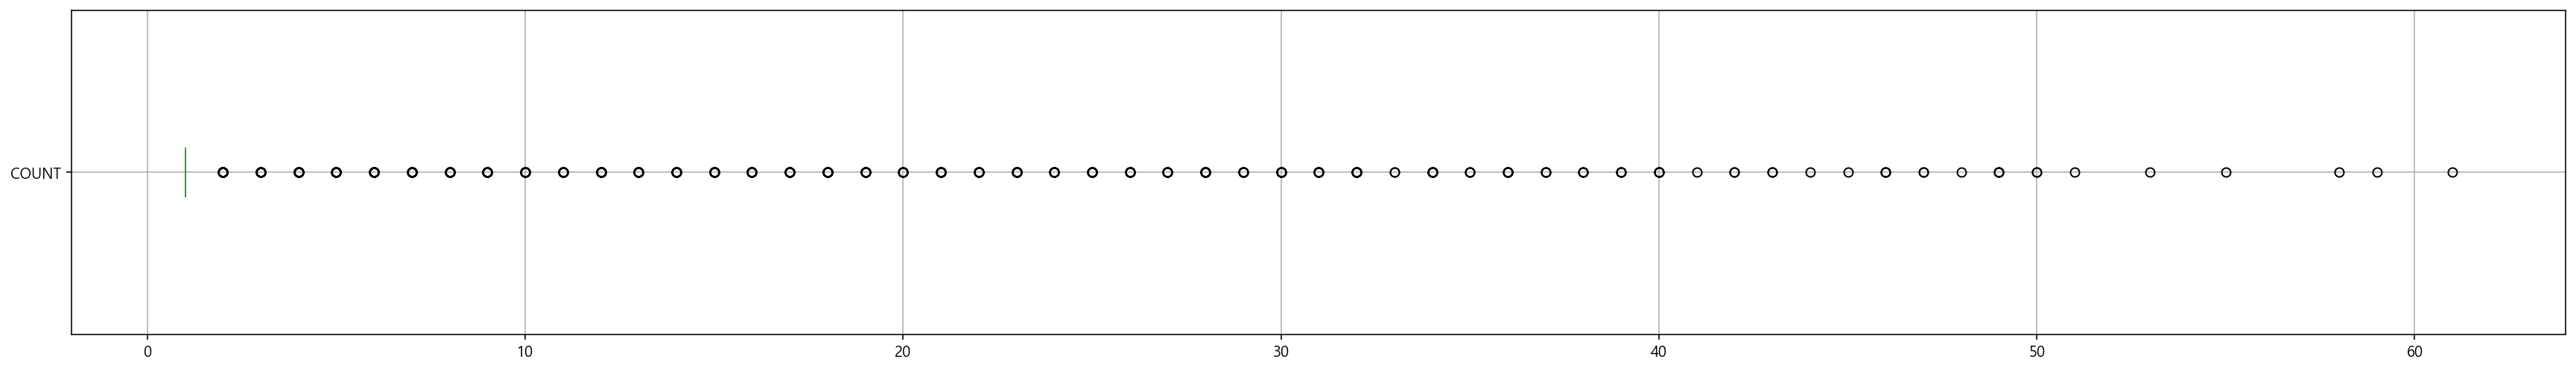

In [33]:
#COUNT, JOIN_DATE, DATE 컬럼에 대하여 이상치 분석
#COUNT 컬럼 이상치 분석
df[['COUNT']].boxplot(figsize=(30,4),vert=0)

<AxesSubplot:>

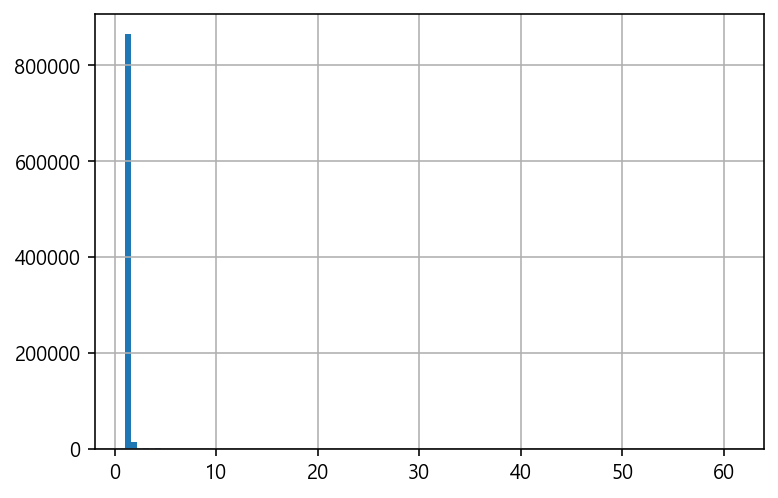

In [49]:
#COUNT, JOIN_DATE, DATE 컬럼에 대하여 이상치 분석
#COUNT 컬럼 이상치 분석
df['COUNT'].hist(bins=100)

In [110]:
#하루에 61회 이용한 고객데이터
df_61=df[df['COUNT']==61]
df_61

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
729776,999665,2018-12-16,CC,96266,A,2020-11-07,61,GN


>**count가 대부분 1,2에 몰려있는 데이터<br>
다른 값들도 단순히 당일 사용한 횟수를 의미하기 때문에 이상치라고 판단하기 힘듬<br>
다만 하루 61회 사용했다는 것은 한 아이디를 돌려쓰고 있다는 것으로 추측됨<br>
특정 횟수(팀원들과 공유 해 판단해야할듯) 이상의 아이디는 돌려쓰는 아이디라고 판단해야 할 것**

<AxesSubplot:>

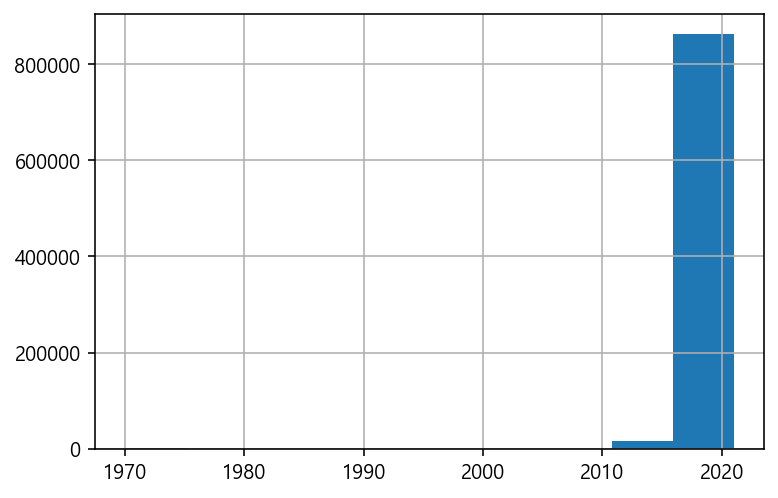

In [52]:
#COUNT, JOIN_DATE, DATE 컬럼에 대하여 이상치 분석
#JOIN_DATE 컬럼 이상치 분석
df['JOIN_DATE'].hist()

In [58]:
df_wrongjoindate=df[df['JOIN_DATE']<='2013-08-01']
df_wrongjoindate

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
437,1081430,1970-01-01,CC,90070,A,2020-01-01,1,GD
2196,1410151,1970-01-01,CC,92437,B,2020-01-02,1,J
2204,1415023,1970-01-01,CC,131081,A,2020-01-02,1,YO
2434,125582,1970-01-01,CC,91885,A,2020-01-03,1,YD
2645,602188,1970-01-01,CC,2334,B,2020-01-03,1,MP
...,...,...,...,...,...,...,...,...
866536,1723400,1970-01-01,CC,190188,A,2020-12-26,1,JR
867913,1723400,1970-01-01,CC,190188,A,2020-12-27,1,JR
868210,1825656,1970-01-01,CC,219936,A,2020-12-27,1,YD
873707,1828010,1970-01-01,CC,220635,C,2020-12-29,1,GN


AxesSubplot(0.125,0.125;0.775x0.755)
1970-01-01 00:00:00
1970-01-01 00:00:00


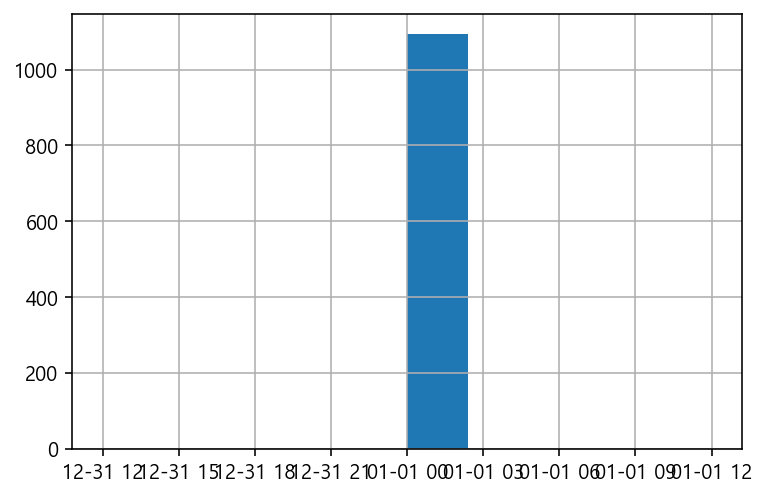

In [63]:
print(df_wrongjoindate['JOIN_DATE'].hist())
print(df_wrongjoindate['JOIN_DATE'].min())
print(df_wrongjoindate['JOIN_DATE'].max())

>**모두의 주차장이 2013년 8월에 서비스를 시작했다는 것을 고려할때 이전의 데이터(전부 1970-01-01 데이터)는 오기입 등의 문제가 있는 잘못된 데이터일 확률이 높음**

In [75]:
#COUNT, JOIN_DATE, DATE 컬럼에 대하여 이상치 분석
#JDATE 컬럼 이상치 분석
date_exploration=df['DATE']
date_exploration.drop_duplicates(inplace=True)
date_exploration.describe()

count                     366
unique                    366
top       2020-03-13 00:00:00
freq                        1
first     2020-01-01 00:00:00
last      2020-12-31 00:00:00
Name: DATE, dtype: object

<AxesSubplot:>

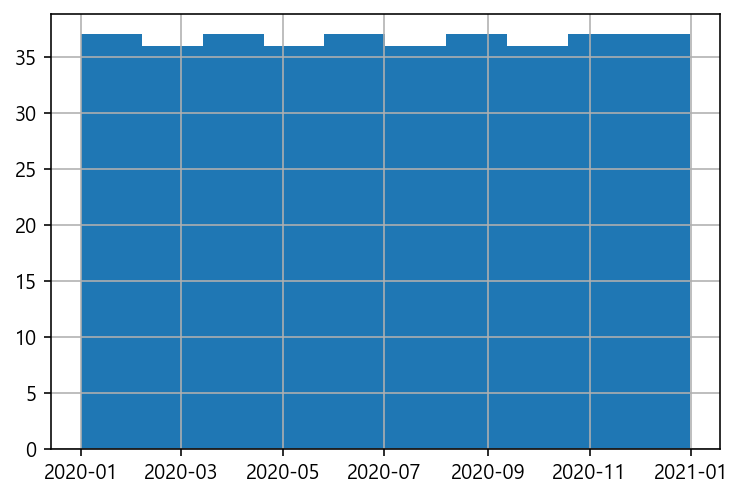

In [81]:
date_exploration.hist()

>**2020년 총 366일, DATE 컬럼은 2020년의 모든 날짜에 대응하는 데이터행을 최소 하나 이상 가지고 있음**

### 2.2. 데이터변환<br>

> **1. USER_ID : 정수형<br>
2. JOIN_DATE : 범주형(문자형)<br>
3. D_TYPE : 범주형(문자형)<br>
4. STORE_ID : 정수형<br>
5. GOODS_TYPE : 범주형(문자형)<br>
6. DATE : 범주형(문자형)<br>
7. <목표변수> COUNT : 정수형<br>
8. AD1 : 범주형(문자형)**

>**연속형 설명변수가 없는 관계로 스케일링작업(표준화 및 정규화)은 필요없다고 판단됨**

## 3.EDA

### 3.1. EDA목표

**(1).데이터의 분포 확인<br>
(2).데이터의 특성 확인<br>
(3).데이터 내 설명변수와 목표변수와의 관계를 중심으로 상관관계 확인**

### 3.2. EDA분석

### 3.2.1.데이터 분포 확인

In [106]:
#USER_ID 컬럼 분포 확인
df_utype_count=df['USER_ID'].value_counts()
print(df_utype_count)

999665     366
591610     244
1355841    235
1407916    222
1224426    222
          ... 
586251       1
1575444      1
1573397      1
1591836      1
30735        1
Name: USER_ID, Length: 165425, dtype: int64


> **특정 주 사용 유저들이 존재한다는 사실을 알 수 있음**

AA    493166
BB    384541
CC      1564
Name: D_TYPE, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


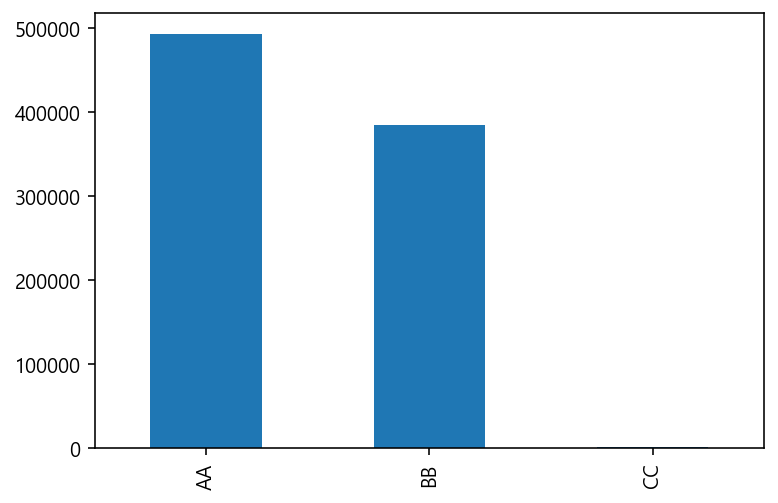

In [105]:
#D_TYPE 컬럼 분포 확인
df_dtype_count=df['D_TYPE'].value_counts()
print(df_dtype_count)
print(df_dtype_count.plot.bar())

> **D_TYPE이 CC인 유저는 수가 다른 두가지 D_TYPE에 비해 압도적으로 적음**

220557    17617
220893    17220
220655    16275
220848    15935
92437     15866
          ...  
230996        1
230216        1
223665        1
223066        1
225629        1
Name: STORE_ID, Length: 1061, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


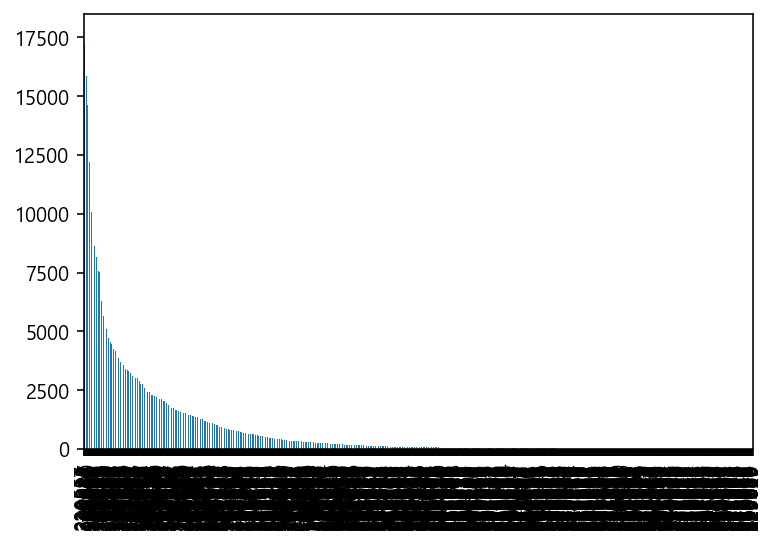

In [102]:
#STORE_ID 컬럼 분포 확인
df_stype_count=df['STORE_ID'].value_counts()
print(df_stype_count)
print(df_stype_count.plot.bar())

> **STORE별로 이용 횟수 차이가 크게 난다는 사실을 알 수 있음**

A    609790
C    131163
B    118541
D     19777
Name: GOODS_TYPE, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


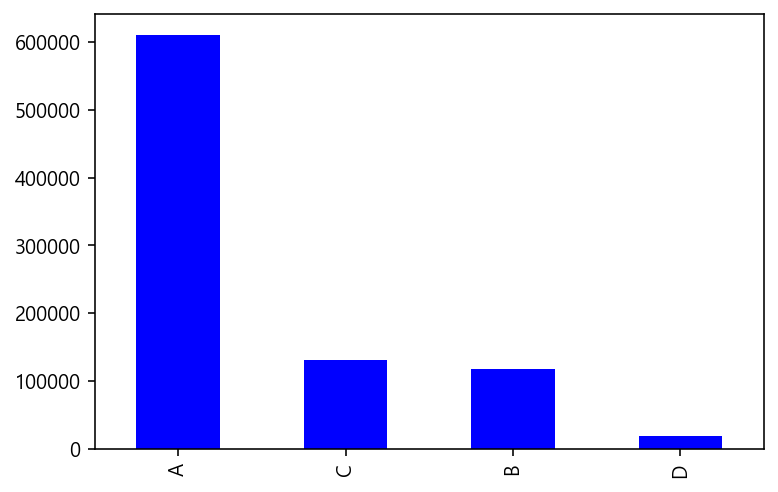

In [101]:
#GOODS_TYPE 컬럼 분포 확인
df_gtype_count=df['GOODS_TYPE'].value_counts()
print(df_gtype_count)
print(df_gtype_count.plot.bar(color='blue'))

> **GOODS_TYPE은 A의 사용이 다른 타입보다 압도적으로 많다는 사실을 알 수 있음**

J      179383
GN     172967
JRR    126586
SC      75856
MP      67819
        ...  
VO          1
DY          1
GR          1
NW          1
ADS         1
Name: AD1, Length: 85, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


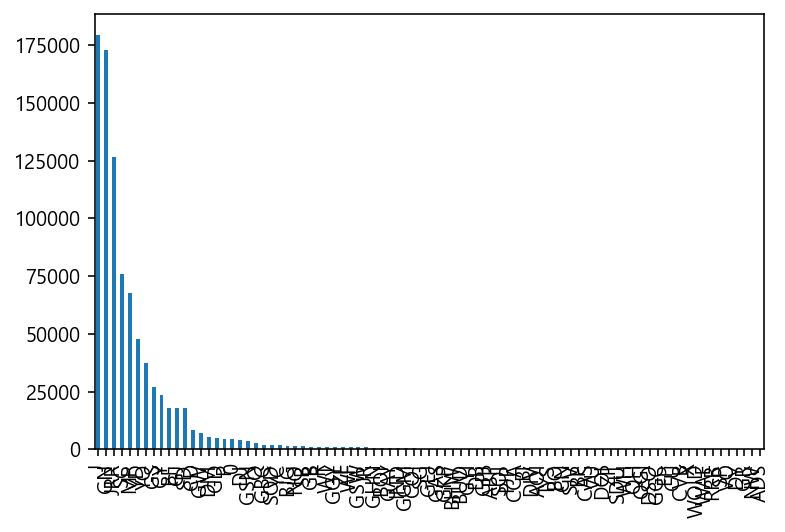

In [103]:
#AD1 컬럼 분포 확인
df_atype_count=df['AD1'].value_counts()
print(df_atype_count)
print(df_atype_count.plot.bar())

> **AD1은 J,GN, JRR의 사용이 다른 변수들보다 비교적 많음**

### 3.2.2.데이터간 상관관계를 포함한 데이터 특성 확인

In [108]:
#사용횟수가 많은 
df_heavy=df[df['USER_ID']==999665]
df_heavy

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
372,999665,2018-12-16,CC,82399,A,2020-01-01,6,JRR
1527,999665,2018-12-16,CC,104988,A,2020-01-02,11,GN
3121,999665,2018-12-16,CC,181832,A,2020-01-03,7,SC
5034,999665,2018-12-16,CC,109223,A,2020-01-04,28,MP
6919,999665,2018-12-16,CC,104916,A,2020-01-05,14,GN
...,...,...,...,...,...,...,...,...
867260,999665,2018-12-16,CC,2428,A,2020-12-27,17,CY
868847,999665,2018-12-16,CC,109267,A,2020-12-28,24,J
871562,999665,2018-12-16,CC,90193,C,2020-12-29,23,GW
874317,999665,2018-12-16,CC,220797,D,2020-12-30,40,GS


In [133]:
#to_do

### 3.2.3.목표변수와의 상관관계 확인

**(1).목표변수(COUNT)의 값이 1,2이 아닌 데이터들 분석**

In [134]:
df_not12

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
372,999665,2018-12-16,CC,82399,A,2020-01-01,6,JRR
1527,999665,2018-12-16,CC,104988,A,2020-01-02,11,GN
1528,1001586,2018-12-19,AA,182296,B,2020-01-02,3,SC
2252,1426222,2019-12-12,BB,109400,A,2020-01-02,3,J
3121,999665,2018-12-16,CC,181832,A,2020-01-03,7,SC
...,...,...,...,...,...,...,...,...
877909,1531339,2020-03-30,BB,82403,A,2020-12-31,3,DJ
878327,1660352,2020-08-18,AA,230991,A,2020-12-31,3,J
878331,1660735,2020-08-18,BB,220607,A,2020-12-31,3,GN
878731,1766801,2020-11-09,AA,222356,D,2020-12-31,3,SD


A    1515
C     260
B     159
D      43
Name: GOODS_TYPE, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


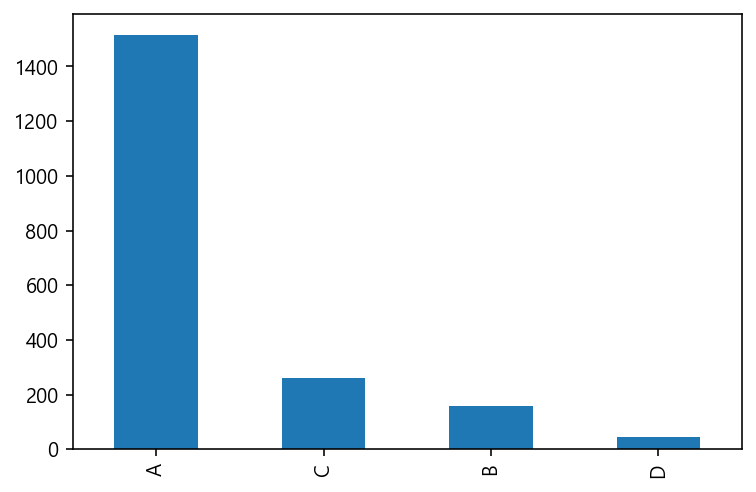

In [135]:
#COUNT가 1,2가 아닌 값들의 GOODS_TYPE 컬럼 분포 확인
dfn_gtype_count=df_not12['GOODS_TYPE'].value_counts()
print(dfn_gtype_count)
print(dfn_gtype_count.plot.bar())

>**전체 데이터와 비교해보았을 때와 비슷한 분포를 보여주고 있음**

AA    1090
BB     515
CC     372
Name: D_TYPE, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


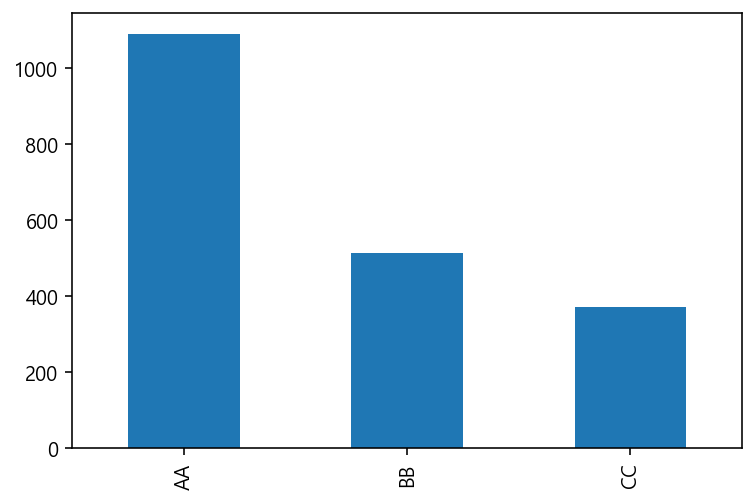

In [122]:
#COUNT가 1,2가 아닌 값들의 D_TYPE 컬럼 분포 확인
dfn_dtype_count=df_not12['D_TYPE'].value_counts()
print(dfn_dtype_count)
print(dfn_dtype_count.plot.bar())

>**전체 데이터와 비교해보았을 때와 CC의 수가 급격히 늘어났음을 확인 가능**

223625    86
220655    79
220607    70
82433     69
220836    60
          ..
109780     1
91156      1
97308      1
158176     1
92156      1
Name: STORE_ID, Length: 294, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


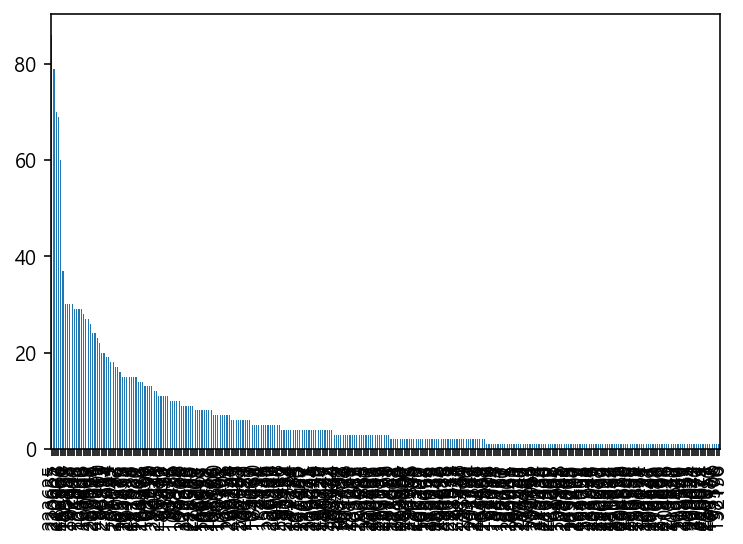

In [124]:
#COUNT가 1,2가 아닌 값들의 STORE_ID 컬럼 분포 확인
dfn_stype_count=df_not12['STORE_ID'].value_counts()
print(dfn_stype_count)
print(dfn_stype_count.plot.bar())

GN     454
J      370
JRR    338
SC     182
CY      99
      ... 
R        1
GB       1
JR       1
GBC      1
P        1
Name: AD1, Length: 36, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


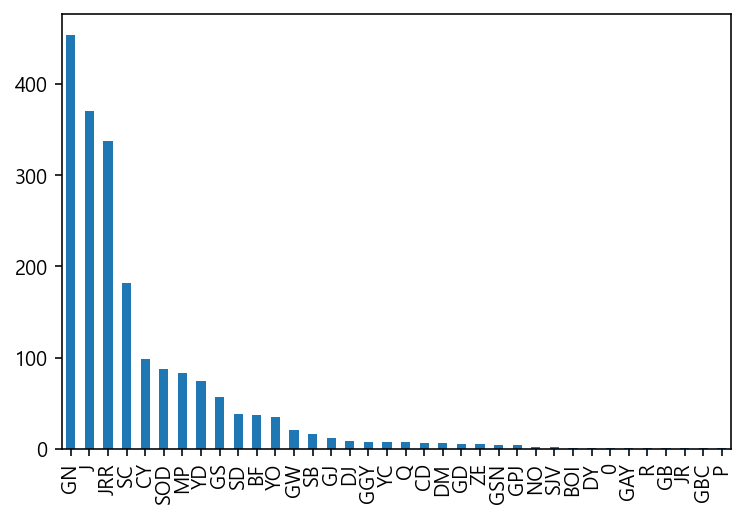

In [127]:
#COUNT가 1,2가 아닌 값들의 STORE_ID 컬럼 분포 확인
dfn_atype_count=df_not12['AD1'].value_counts()
print(dfn_atype_count)
print(dfn_atype_count.plot.bar())

>**전체 데이터와 비교해보았을 때와 비슷한 분포를 보여주고 있음**

**(2). GOODS_TYPE과 목표변수(COUNT)의 관계****

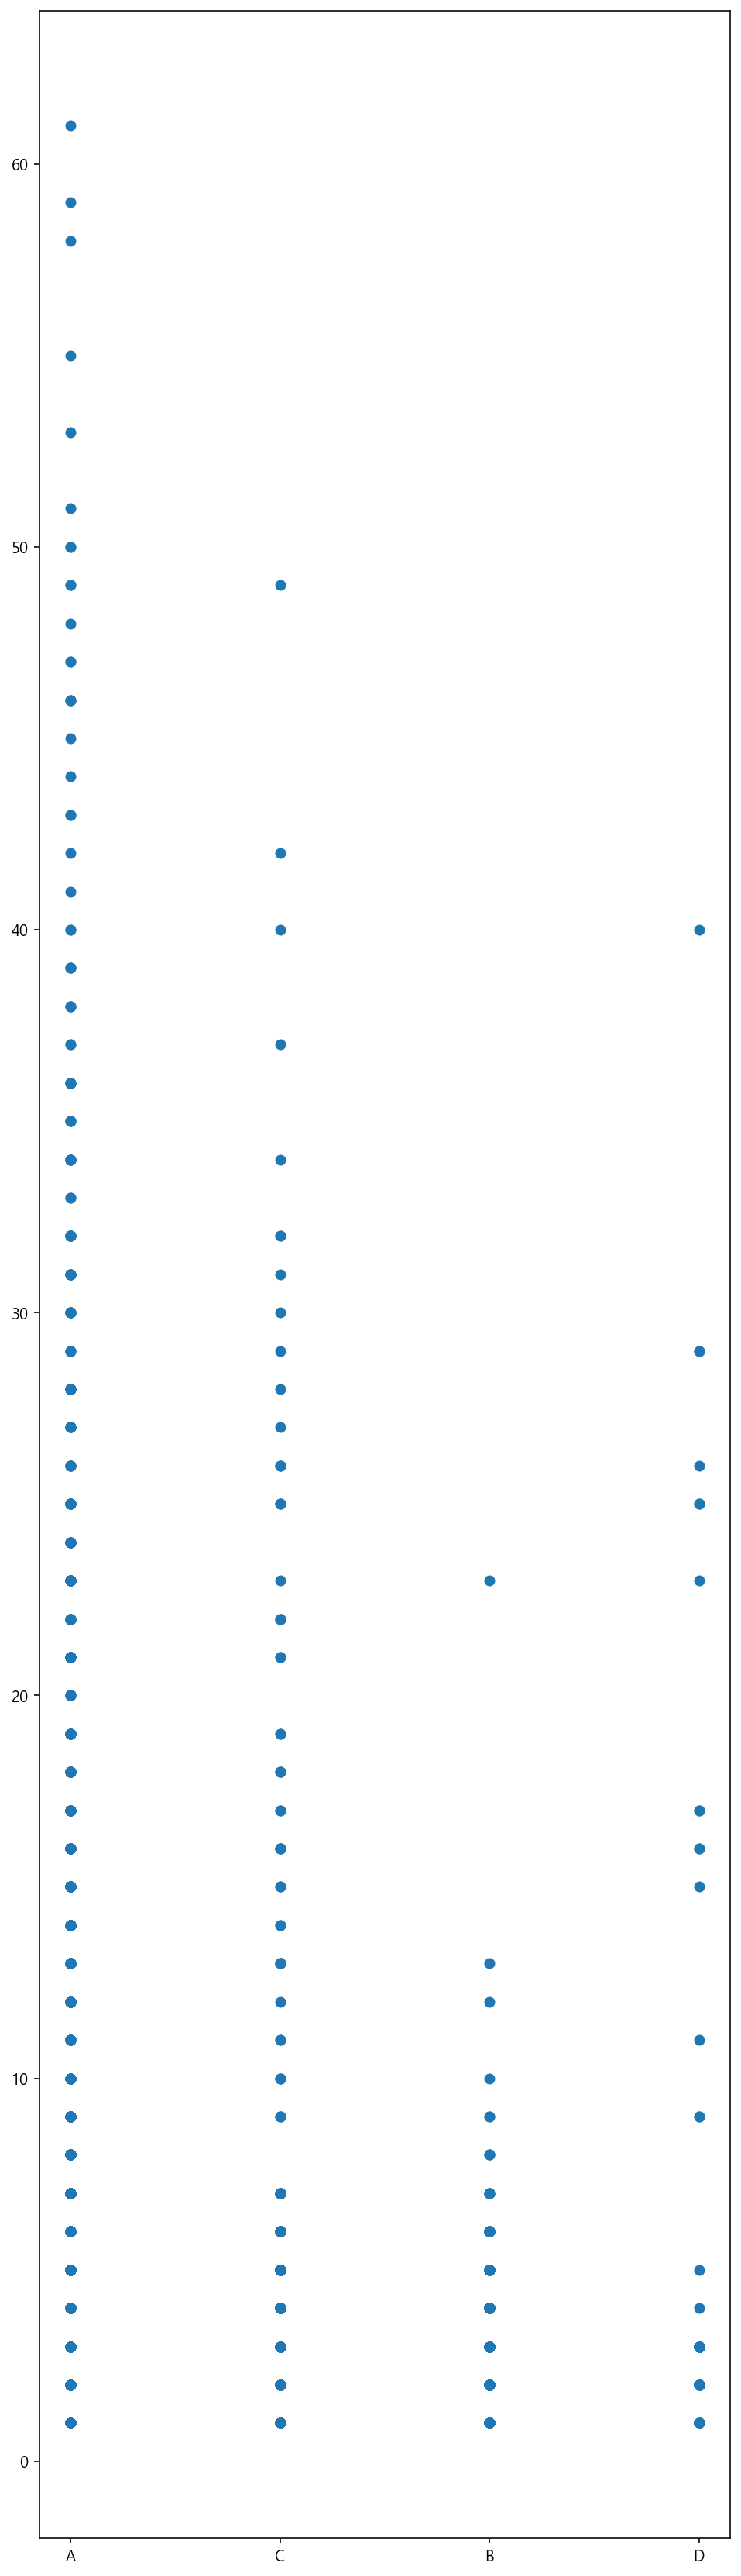

In [137]:
#GOODS_TYPE과 목표변수와의 상관관계
gx=df['GOODS_TYPE']
gy=df['COUNT']
plt.figure(figsize=(8,30))
plt.scatter(gx,gy)
plt.show()

> **GOODS_TYPE B는 낮은 COUNT를 기록하는 경향이 있음<br>
40이상의 COUNT를 기록한 데이터는 GOODS_TYPE이 대부분 A값을 가짐
50이상의 COUNT를 기록한 데이터는 GOODS_TYPE이 모두 A값을 가짐**

**(3). D_TYPE과 목표변수(COUNT)의 관계****

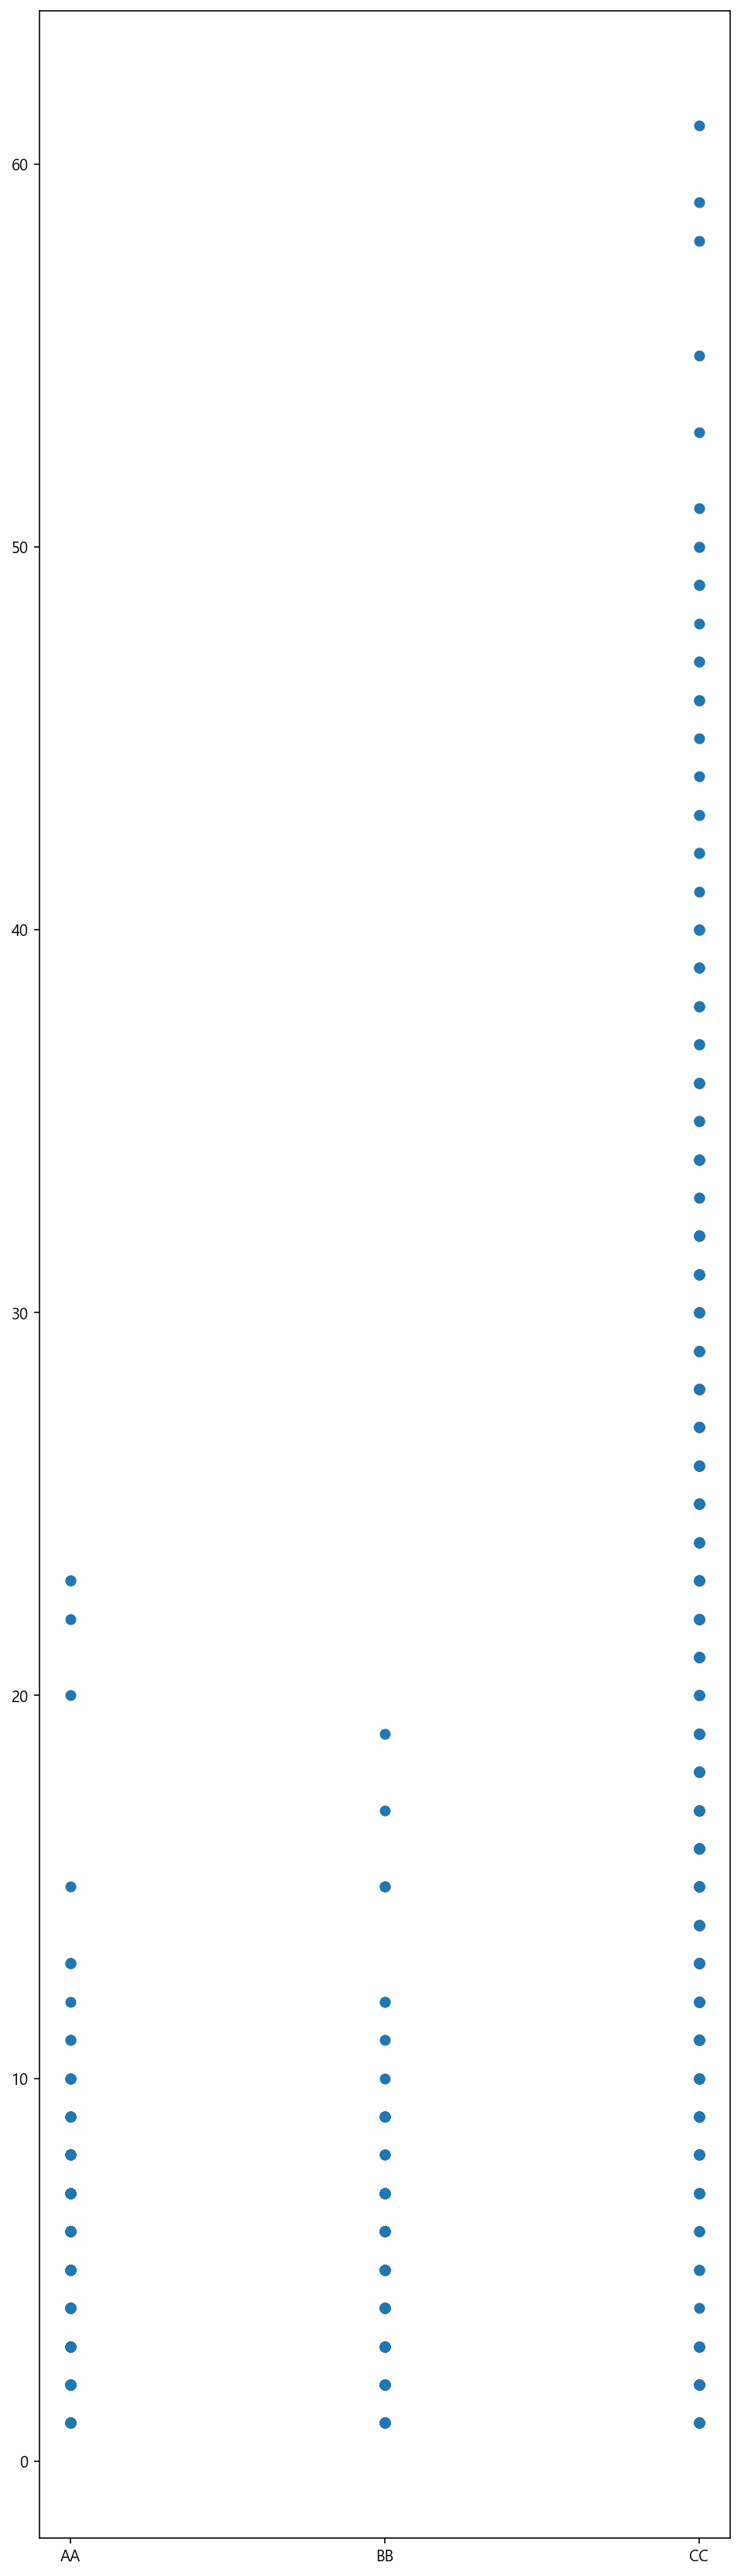

In [138]:
#D_TYPE과 목표변수와의 상관관계
dx=df['D_TYPE']
dy=df['COUNT']
plt.figure(figsize=(8,30))
plt.scatter(dx,dy)
plt.show()

>**COUNT가 25이상의 데이터는 전부 D_TYPE이 CC인 것을 확인할 수 있음<br>
>COUNT가 25이상의 데이터에 대해 추가분석 진행필요**

In [139]:
df_25=df[df['COUNT']>=25]
df_25

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
5034,999665,2018-12-16,CC,109223,A,2020-01-04,28,MP
30623,999665,2018-12-16,CC,182242,A,2020-01-18,27,MP
45805,999665,2018-12-16,CC,190172,A,2020-01-28,33,YO
234323,999665,2018-12-16,CC,182320,A,2020-04-30,25,JRR
241410,999665,2018-12-16,CC,92264,A,2020-05-04,25,JRR
...,...,...,...,...,...,...,...,...
858597,999665,2018-12-16,CC,221016,A,2020-12-23,28,J
861537,999665,2018-12-16,CC,221016,A,2020-12-24,36,J
865582,999665,2018-12-16,CC,181777,C,2020-12-26,26,BF
874317,999665,2018-12-16,CC,220797,D,2020-12-30,40,GS


In [140]:
df_25['D_TYPE'].value_counts()

CC    130
Name: D_TYPE, dtype: int64

In [142]:
df_25['GOODS_TYPE'].value_counts()

A    106
C     18
D      6
Name: GOODS_TYPE, dtype: int64

**(4).1970년 가입데이터와 목표변수(COUNT)의 관계**

>**오류값으로 추정되었던 1970년도 가입데이터는 어떤 실험데이터가 아니었을까? 특정 COUNT분포를 보여주지 않을까?**

In [145]:
df_1970=df[df['JOIN_DATE']=='1970-01-01']
df_1970['COUNT'].value_counts()

1    1071
2      19
3       2
4       1
Name: COUNT, dtype: int64

>**(COUNT가1,2가 아닌데이터)/(전체데이터) 비율이 0.2%로 특이한 분포를 보여주고있지는 않음**

**(5). 가입날짜와 목표변수(COUNT)의 관계**

<AxesSubplot:xlabel='JOIN_DATE'>

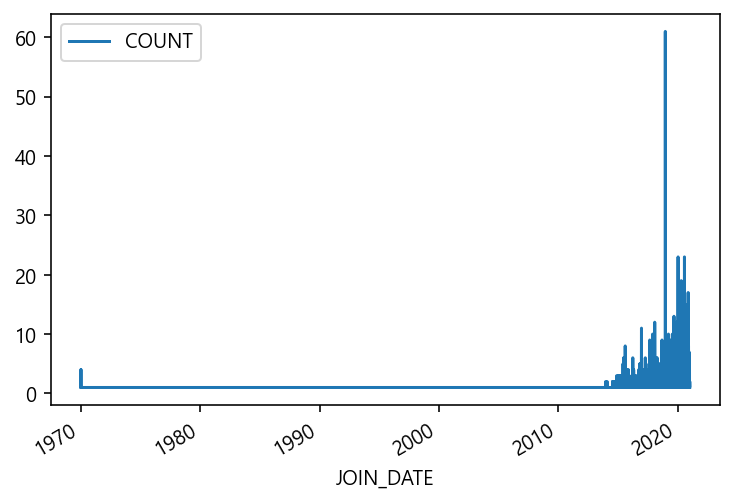

In [147]:
df.plot(x='JOIN_DATE', y='COUNT')

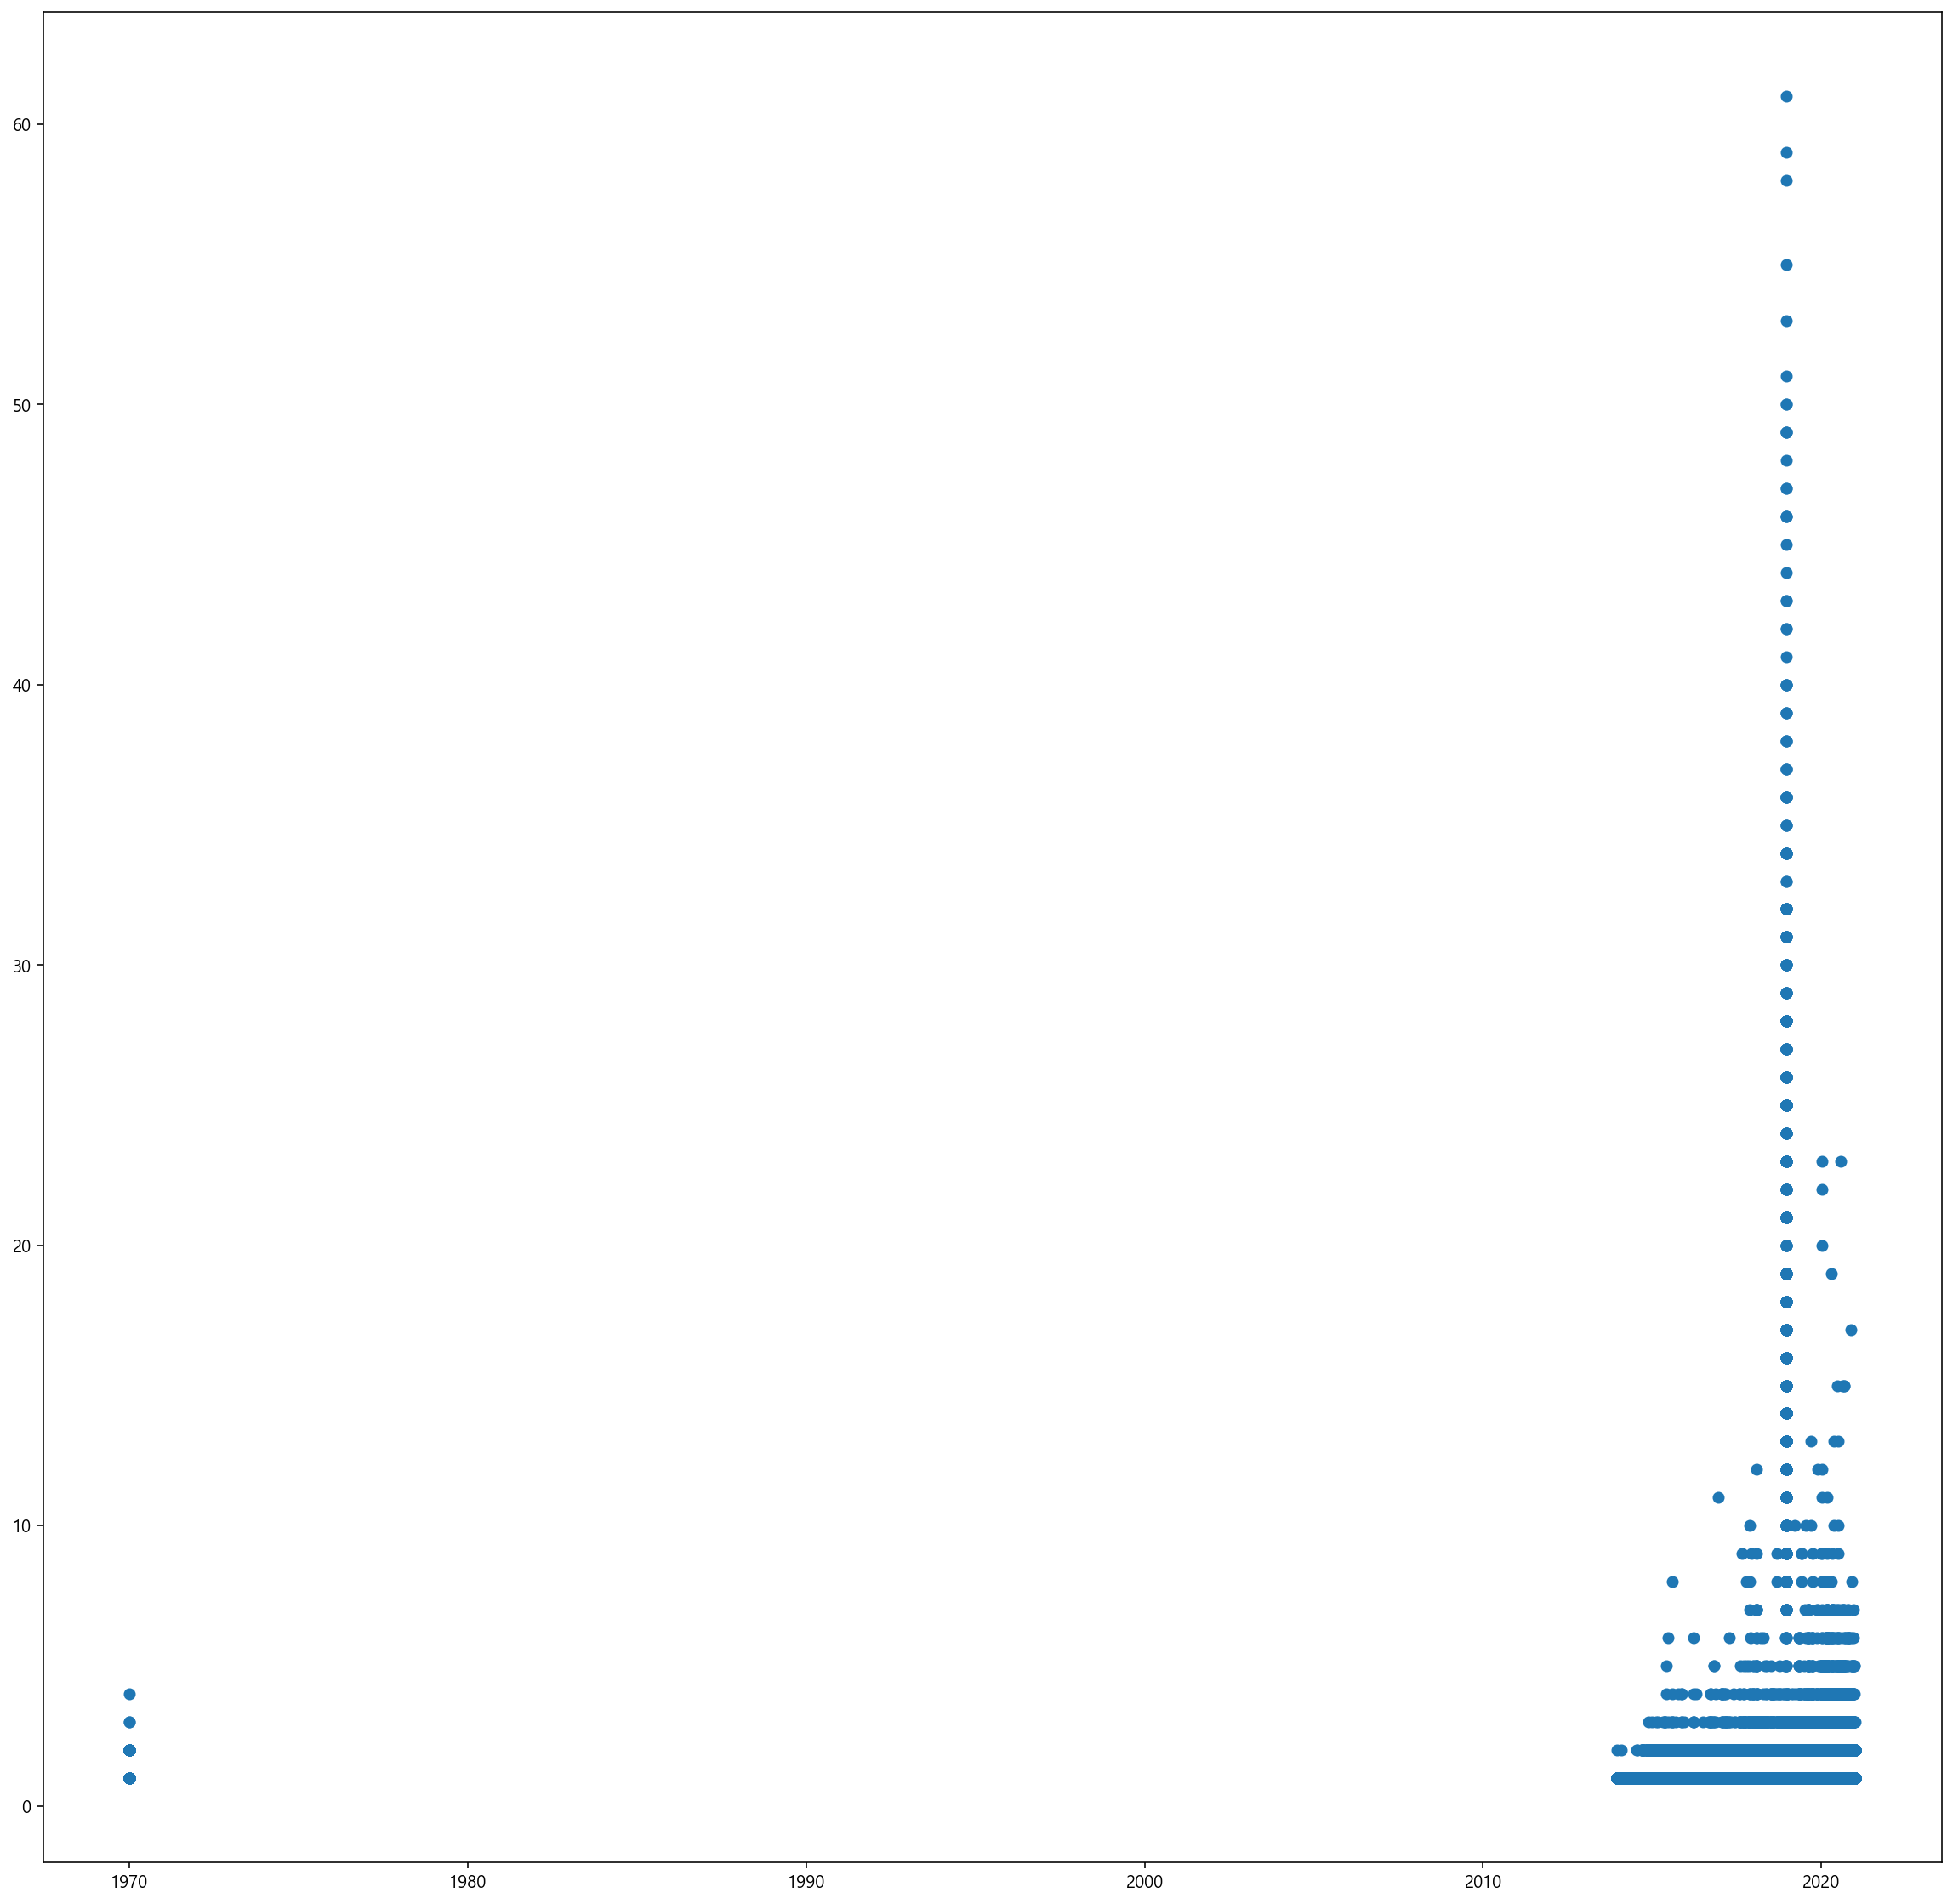

In [151]:
jx=df['JOIN_DATE']
jy=df['COUNT']
plt.figure(figsize=(20,20))
plt.scatter(jx,jy)
plt.show()

>**COUNT가 20 중반이상인 데이터는 특정날짜에 가입한 데이터들로 확인됨<br>
즉 이날 D_TYPE을 CC로하는 대규모계약이 이루어졌을것으로 추정됨**

**(6). 이용날짜와 목표변수(COUNT)의 관계**

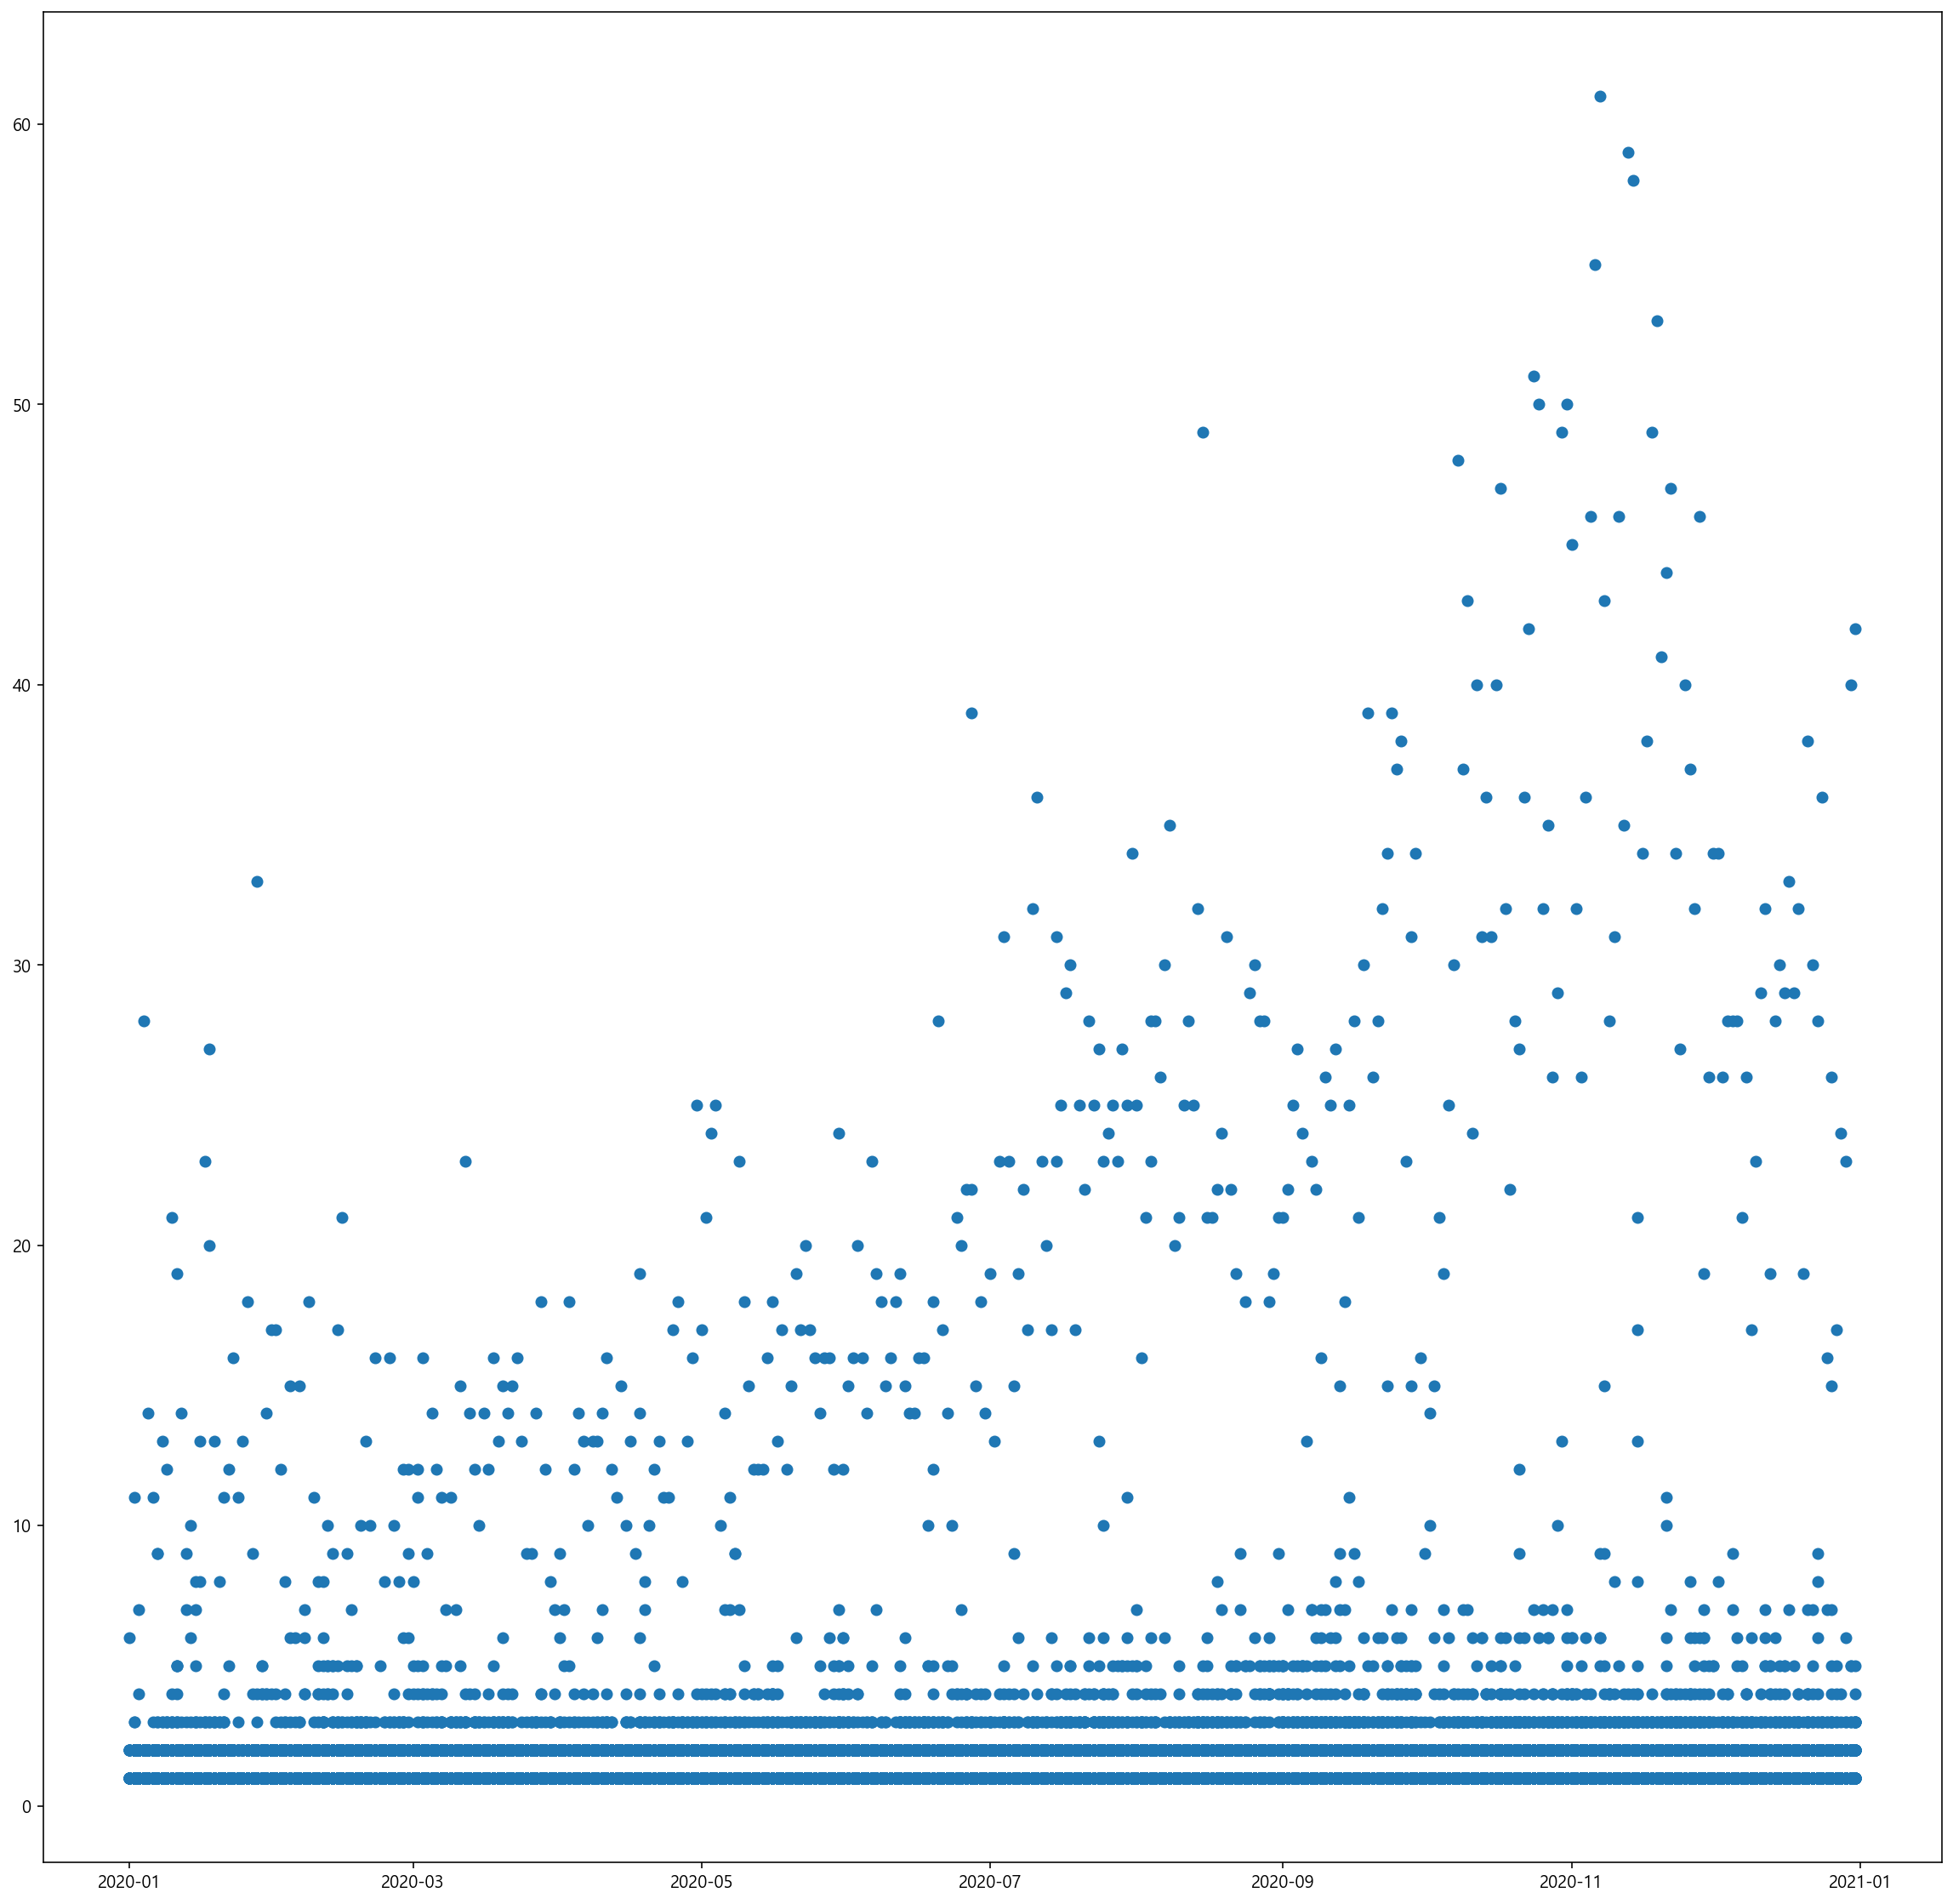

In [150]:
ddx=df['DATE']
ddy=df['COUNT']
plt.figure(figsize=(20,20))
plt.scatter(ddx,ddy)
plt.show()

>**서비스 이용날짜가 최근에 가까워짐에 따라 COUNT의 수가 커지는 경향을 보임**

### 3.3. EDA결론

### 3.3.1. EDA정리

**(1). 목표변수 COUNT는 1,2에 값이 집중되어있음. 값이 1,2가 아닌 데이터의 비율은 0.2%<br>
(2). GOODS_TYPE B는 낮은 COUNT를 기록하는 경향이 있음<br>
(3). 50이상의 COUNT를 기록한 데이터는 GOODS_TYPE이 모두 A값을 가짐<br>
(3). COUNT가 20 중반 이상의 값을 기록한 데이터는 특정 D_TYPE값만을 가짐<br>
(4). COUNT가 20 중반 이상의 값을 기록한 데이터는 특정 JOIN_DATE값만을 가짐<br>
(5). JOIN_DATE가 최근에 가까워짐에 따라 COUNT의 수가 커지는 경향을 보임<br>
(6). DATE가 최근에 가까워짐에 따라 COUNT의 수가 커지는 경향을 보임<br>**